In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import h5py
from math import pi

from analysis.config import birds, h5_path_dict
from analysis.ExpData import ExpData
from analysis.EpisodeCalc import EpisodeCalc

In [2]:
f = h5py.File(h5_path_dict['LMN73'][1].as_posix(), 'r')
exp_data = ExpData(f)

# Episode Cell Identified by F.R. Index

In [7]:
ep_calc = EpisodeCalc(window=30, num_shuffles=100, threshold=0.99)
cr_idx_mat, significance = ep_calc.calc_ep_index(exp_data)

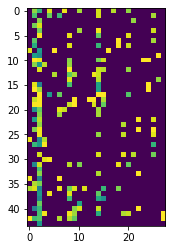

In [8]:
x = cr_idx_mat[:, significance > 0.99]
plt.imshow(np.vstack((
    x[exp_data.cr_was_cache],
    x[exp_data.cr_was_retrieval]
    )))

In [9]:
np.sum(significance > .99)

28

# Episode Cell Identified by Mutual Info

In [10]:
ep_calc = EpisodeCalc(window=30, num_shuffles=150, threshold=0.99)
ep_info, significance_info = ep_calc.calc_ep_mi(exp_data)

In [11]:
np.sum(significance_info > .99)

17

In [22]:
x = np.argwhere(significance > 0.99).squeeze()
y = np.argwhere(significance_info > 0.99).squeeze()
np.intersect1d(x,y).size

17

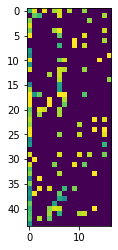

In [21]:
x = cr_idx_mat[:, significance_info > 0.99]
plt.imshow(np.vstack((
    x[exp_data.cr_was_cache],
    x[exp_data.cr_was_retrieval]
    )))